In [52]:
import numpy as np
import re
import pandas as pd
from math import exp
import matplotlib.pyplot as plt

In [53]:
#read data
df = pd.read_csv ('F:/ML/data.csv', header=None)
#print(df)

In [54]:
DATA = 150
ALPHA = 0.01
EPOCH = 100

#create fact
f1 = np.empty(DATA)
f2 = np.empty(DATA)
f3 = np.empty(DATA)

f1[0:50] = 1
f1[50:150] = 0
f2[0:50] = 0
f2[50:100] = 1
f2[100:150] = 0
f3[0:100] = 0
f3[100:150] = 1

#Fact to Dataframe
d = {'f1': f1, 'f2': f2, 'f3': f3}
fdf = pd.DataFrame(data=d)
#print(fdf)

#Join df and fact
df = pd.concat([df, fdf], axis=1, join='inner')
print(df)

       0    1    2    3               4   f1   f2   f3
0    5.1  3.5  1.4  0.2     Iris-setosa  1.0  0.0  0.0
1    4.9  3.0  1.4  0.2     Iris-setosa  1.0  0.0  0.0
2    4.7  3.2  1.3  0.2     Iris-setosa  1.0  0.0  0.0
3    4.6  3.1  1.5  0.2     Iris-setosa  1.0  0.0  0.0
4    5.0  3.6  1.4  0.2     Iris-setosa  1.0  0.0  0.0
5    5.4  3.9  1.7  0.4     Iris-setosa  1.0  0.0  0.0
6    4.6  3.4  1.4  0.3     Iris-setosa  1.0  0.0  0.0
7    5.0  3.4  1.5  0.2     Iris-setosa  1.0  0.0  0.0
8    4.4  2.9  1.4  0.2     Iris-setosa  1.0  0.0  0.0
9    4.9  3.1  1.5  0.1     Iris-setosa  1.0  0.0  0.0
10   5.4  3.7  1.5  0.2     Iris-setosa  1.0  0.0  0.0
11   4.8  3.4  1.6  0.2     Iris-setosa  1.0  0.0  0.0
12   4.8  3.0  1.4  0.1     Iris-setosa  1.0  0.0  0.0
13   4.3  3.0  1.1  0.1     Iris-setosa  1.0  0.0  0.0
14   5.8  4.0  1.2  0.2     Iris-setosa  1.0  0.0  0.0
15   5.7  4.4  1.5  0.4     Iris-setosa  1.0  0.0  0.0
16   5.4  3.9  1.3  0.4     Iris-setosa  1.0  0.0  0.0
17   5.1  

In [55]:
def h (x, t) :
    return  np.dot(x, t)
def sigmoid (h) :
    return 1 / (1 + exp(-h))
def table_count(data):
    return data.iloc[:,0].size
def theta_bias_initiation():
    theta1 = np.array([[0.1, 0.2, 0.3, 0.4], 
                       [0.2, 0.3, 0.4, 0.5],
                       [0.3, 0.4, 0.5, 0.6]])
    bias1 = np.array([0.4,0.5,0.6])

    theta2 = np.array([[0.6, 0.5, 0.4], 
                       [0.5, 0.4, 0.3],
                       [0.4, 0.3, 0.2]])
    bias2 = np.array([0.4,0.3,0.2])

    return [theta1, bias1, theta2, bias2]
def predict(sigmoid):
    if(sigmoid < 0.5):
        return 0
    else:
        return 1
def checking_accuration(data1,data2):
    checking = np.zeros(table_count(data1), dtype=bool)
    for i in range(table_count(data1)):
        checking[i] = np.array_equal(data1.iloc[i].values, data2.iloc[i].values)   
    return checking


In [56]:
def backprop(training,r):
    theta1 = np.array(r[0])
    bias1 = np.array(r[1])
    theta2 = np.array(r[2])
    bias2 = np.array(r[3])
    
    error1 = 0
    error2 = 0
    error3 = 0

    for i in range(table_count(training)):
        h11 = h(training.iloc[i,:4],theta1[0,:4]) + bias1[0]
        h12 = h(training.iloc[i,:4],theta1[1,:4]) + bias1[1]
        h13 = h(training.iloc[i,:4],theta1[2,:4]) + bias1[2]

        s11 = sigmoid(h11)
        s12 = sigmoid(h12)
        s13 = sigmoid(h13)
    
        h21 = s11 * theta2[0][0] + s12 * theta2[0][1] + s13 * theta2[0][2] + bias2[0]
        h22 = s11 * theta2[1][0] + s12 * theta2[1][1] + s13 * theta2[1][2] + bias2[1]
        h23 = s11 * theta2[2][0] + s12 * theta2[2][1] + s13 * theta2[2][2] + bias2[2]
    
        s21 = sigmoid(h21)
        s22 = sigmoid(h22)
        s23 = sigmoid(h23)
    
        error1 += (s21 - training.iloc[i,5])**2
        error2 += (s22 - training.iloc[i,6])**2
        error3 += (s23 - training.iloc[i,7])**2
    
        tau21 = 2*(s21 - training.iloc[i,5]) * (1-s21)*s21
        dw21 = tau21 * s11
        dw24 = tau21 * s12
        dw27 = tau21 * s13
    
        tau22 = 2*(s22 - training.iloc[i,6]) * (1-s22)*s22
        dw22 = tau22 * s11
        dw25 = tau22 * s12
        dw28 = tau22 * s13
        
        tau23 = 2*(s23 - training.iloc[i,7]) * (1-s23) * s23
        dw23 = tau23 * s11
        dw26 = tau23 * s12
        dw29 = tau23 * s13
    
        tau11 = (tau21 * theta2[0,0] + tau22 * theta2[1,0] + tau23 * theta2[2,0]) * (1-s11) * s11
        dw11 = tau11 * training.iloc[i,0]
        dw14 = tau11 * training.iloc[i,1]
        dw17 = tau11 * training.iloc[i,2]
        dw110 = tau11 * training.iloc[i,3]

        tau12 = (tau21 * theta2[0,1] + tau22 * theta2[1,1] + tau23 * theta2[2,1]) *(1-s12)*s12
        dw12 = tau12 * training.iloc[i,0]
        dw15 = tau12 * training.iloc[i,1]
        dw18 = tau12 * training.iloc[i,2]
        dw111 = tau12 * training.iloc[i,3]
        
        tau13 = (tau21 * theta2[0,2] + tau22 * theta2[1,2] + tau23 * theta2[2,2]) * (1-s13) * s13
        dw13 = tau13 * training.iloc[i,0]
        dw16 = tau13 * training.iloc[i,1]
        dw19 = tau13 * training.iloc[i,2]
        dw112 = tau13 * training.iloc[i,3]
    
        dw2 = np.array([[dw21, dw24, dw27],
                        [dw22, dw25, dw28],
                        [dw23, dw26, dw29]])
        
        dbias2 = np.array([tau21, tau22, tau23])

        dw1 = np.array([[dw11, dw14, dw17, dw110],
                        [dw12, dw15, dw18, dw111],
                        [dw13, dw16, dw19, dw112]])

        dbias1 = np.array([tau11, tau12, tau13])
        
        theta1 = theta1 - ALPHA * dw1
        bias1 = bias1 - ALPHA * dbias1
        theta2 = theta2 - ALPHA * dw2
        bias2 = bias2 - ALPHA * dbias2
        
    error = np.array([error1, error2,error3])
    error = error/table_count(training)
    error = np.mean(error)
    
    return np.array([[error],[theta1, bias1, theta2, bias2]])


In [57]:
def test(testing, r):
    theta1 = np.array(r[0])
    bias1 = np.array(r[1])
    theta2 = np.array(r[2])
    bias2 = np.array(r[3])
    
    prediksi1 = np.zeros(table_count(testing))
    prediksi2 = np.zeros(table_count(testing))
    prediksi3 = np.zeros(table_count(testing))

    error1 = 0
    error2 = 0
    error3 = 0
    
    for i in range(table_count(testing)):
        h11 = h(testing.iloc[i,:4],theta1[0,:4]) + bias1[0]
        h12 = h(testing.iloc[i,:4],theta1[1,:4]) + bias1[1]
        h13 = h(testing.iloc[i,:4],theta1[2,:4]) + bias1[2]

        s11 = sigmoid(h11)
        s12 = sigmoid(h12)
        s13 = sigmoid(h13)
    
        h21 = s11 * theta2[0][0] + s12 * theta2[0][1] + s13 * theta2[0][2] + bias2[0]
        h22 = s11 * theta2[1][0] + s12 * theta2[1][1] + s13 * theta2[1][2] + bias2[1]
        h23 = s11 * theta2[2][0] + s12 * theta2[2][1] + s13 * theta2[2][2] + bias2[2]
    
        s21 = sigmoid(h21)
        s22 = sigmoid(h22)
        s23 = sigmoid(h23)
        
        prediksi1[i] = predict(s21)
        prediksi2[i] = predict(s22)
        prediksi3[i] = predict(s23)
    
        error1 += (s21 - testing.iloc[i,5])**2
        error2 += (s22 - testing.iloc[i,6])**2
        error3 += (s23 - testing.iloc[i,7])**2
        
    error = np.array([error1, error2,error3])
    error = error/table_count(testing)
    error = np.mean(error)
    
    predict_table = pd.DataFrame({'prediksi 1':prediksi1,
                                  'prediksi 2':prediksi2,
                                  'prediksi 3':prediksi3})
    
    text.append(str(predict_table)+"\n")
    
    conditional = checking_accuration(testing.iloc[:,5:8], predict_table)
    unique, count = np.unique(conditional, return_counts=True)
    c = np.where(unique == True)
    if(c[0].size != 0):   
        akurasi = (float(count[c[0][0]]) / table_count(testing)) * 100
        text.append("Akurasi "+str(akurasi)+"\n")
    else:
        akurasi = 0
        text.append("Akurasi "+str(akurasi)+"\n")
    return np.array([error,akurasi])

Error Training tiap Epoch
[0.28294279 0.22024399 0.21784755 0.21327263 0.20498909 0.19379963
 0.18185024 0.17077894 0.16128202 0.15344759 0.14708935 0.14194368
 0.13775925 0.13432627 0.13147924 0.12909054 0.12706243 0.12531994
 0.12380518 0.12247316 0.12128853 0.12022338 0.11925541 0.11836675
 0.117543   0.1167725  0.11604582 0.11535533 0.11469489 0.11405958
 0.1134455  0.11284958 0.11226946 0.11170333 0.11114986 0.1106081
 0.11007735 0.10955719 0.10904734 0.10854765 0.10805806 0.10757856
 0.10710916 0.1066499  0.10620079 0.10576186 0.1053331  0.10491446
 0.1045059  0.10410732 0.10371861 0.10333963 0.10297023 0.10261021
 0.10225937 0.10191752 0.10158441 0.10125981 0.10094349 0.1006352
 0.10033468 0.1000417  0.099756   0.09947734 0.09920549 0.0989402
 0.09868126 0.09842843 0.0981815  0.09794027 0.09770453 0.0974741
 0.09724878 0.0970284  0.0968128  0.0966018  0.09639525 0.096193
 0.09599492 0.09580087 0.09561071 0.09542432 0.09524159 0.0950624
 0.09488665 0.09471423 0.09454505 0.094379 

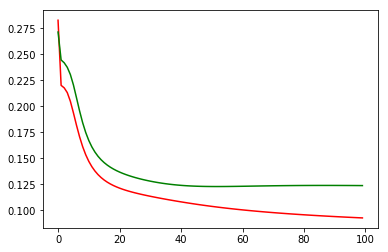

In [58]:
error_training_epoch = np.empty(EPOCH)
error_testing_epoch = np.empty(EPOCH)
akurasi_epoch = np.empty(EPOCH)

error_training = 0
error_testing = 0
akurasi = 0

testing = df.iloc[0:30]
training = df.iloc[30:150]

text.append(str(testing)+"\n")

training_result = backprop(training, theta_bias_initiation())
error_training = error_training + training_result[0][0]

testing_result = test(testing,training_result[1])
error_testing = error_testing + testing_result[0]
akurasi = akurasi + testing_result[1]


for i in range(EPOCH):
    testing = df.iloc[30:60]
    training = df.iloc[0:30]
    training = training.append(df.iloc[60:150])

    text.append(str(testing)+"\n")
    
    training_result = backprop(training,training_result[1])
    error_training = error_training + training_result[0][0]

    testing_result = test(testing,training_result[1])
    error_testing = error_testing + testing_result[0]
    akurasi = akurasi + testing_result[1]

    testing = df.iloc[60:90]
    training = df.iloc[0:60]
    training = training.append(df.iloc[90:150])

    text.append(str(testing)+"\n")
    
    training_result = backprop(training,training_result[1])
    error_training = error_training + training_result[0][0]

    testing_result = test(testing,training_result[1])
    error_testing = error_testing + testing_result[0]
    akurasi = akurasi + testing_result[1]

    testing = df.iloc[90:120]
    training = df.iloc[0:90]
    training = training.append(df.iloc[120:150])

    text.append(str(testing)+"\n")
    
    training_result = backprop(training,training_result[1])
    error_training = error_training + training_result[0][0]

    testing_result = test(testing,training_result[1])
    error_testing = error_testing + testing_result[0]
    akurasi = akurasi + testing_result[1]

    testing = df.iloc[120:150]
    training = df.iloc[0:120]
    
    text.append(str(testing)+"\n")
    
    training_result = backprop(training,training_result[1])
    error_training = error_training + training_result[0][0]
    
    testing_result = test(testing,training_result[1])
    error_testing = error_testing + testing_result[0]
    akurasi = akurasi + testing_result[1]
    
    mean_error_training = error_training/5
    mean_error_testing = error_testing/5
    mean_akurasi = akurasi/5
    error_training_epoch[i] = mean_error_training
    error_testing_epoch[i] = mean_error_testing
    akurasi_epoch[i] = mean_akurasi
    
    if(i<EPOCH-1):
        text.append("Epoch "+str(i+1)+"\n")
        text.append("=======")
        #print("Epoch", str(EPOCH+1))
        error_training = 0
        error_testing = 0
        akurasi = 0

        testing = df.iloc[0:30]
        training = df.iloc[30:150]
        text.append(str(testing)+"\n")
        #print(testing)
        #print( training

        #print( theta_bias_initiation()
        training_result = backprop(training, training_result[1])
        error_training = error_training + training_result[0][0]
        #print( training_result
        testing_result = test(testing,training_result[1])
        error_testing = error_testing + testing_result[0]
        akurasi = akurasi + testing_result[1]

        #print( error_training
        #print( error_testing
        #print(akurasi)

print("Error Training tiap Epoch")
print(error_training_epoch)
print("Error Testing tiap Epoch")
print(error_testing_epoch)
print("Akurasi tiap Epoch")
print(akurasi_epoch)

plt.plot(error_training_epoch,'r',error_testing_epoch,'g')
#plt.scatter(np.arange(100),akurasi_epoch)
plt.show()